# Docsumo Workshop Day 3



In [9]:
!cat requirements.txt

jupyterlab==3.4.8
matplotlib==3.6.3
numpy==1.24.2
opencv-python==4.7.0.68
pandas==1.5.3
Pillow==9.4.0
scikit-image==0.19.3
scipy==1.10.0


In [142]:
!python --version

Python 3.10.9


## Contents

- Introduction to Computer Vision
- Images and their properties
    - RGB image and Grayscale image
- Image Filtering and Sharpening
- Edge Detection
    - Example: Canny edge detector
- Face detection
- Tools
    - OpenCv
    - Skimage

## Resources and References [This notebook uses the following resources]
- https://fpcv.cs.columbia.edu/  [First Principles of Computer Vision]

- Videos
    - https://nptel.ac.in/courses/106106224 
    - https://www.youtube.com/@DigitalSreeni

# What is computer vision

- https://www.youtube.com/watch?v=wVE8SFMSBJ0 
- https://cave.cs.columbia.edu/Statics/monographs/Introduction%20FPCV-0-1.pdf 

- Buliding machines that can see

- Human vision tends to be more qualitative than quantitative

- a computer vision system can be designed to surpass the capability of human vision and extract information about the world that we simply cannot

## Computer Vision is
- automating human visual processes
- an information processing task

# Images and their properties
- https://towardsdatascience.com/exploring-the-mnist-digits-dataset-7ff62631766a

## How is image stored in computer 
- https://codeburst.io/how-are-images-stored-on-a-computer-353ac16b6d8f

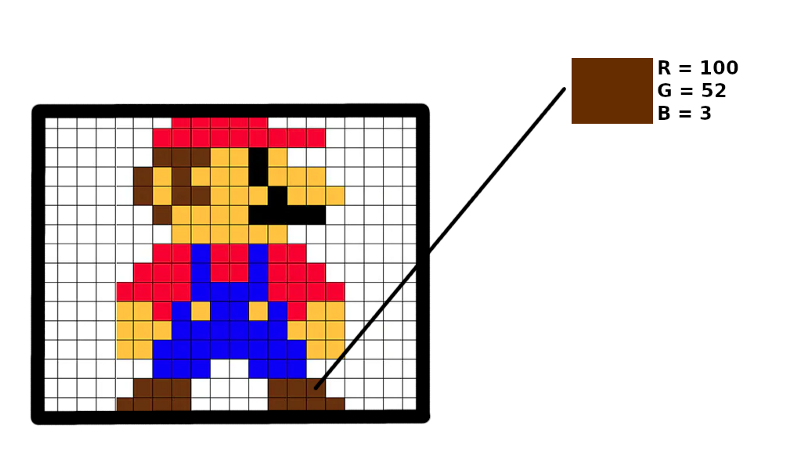

## An Image is an **Array of Pixels**

*Matrix containing pixel values*

## But agian what is pixel(s)
A Pixel has Values like(optional)
- Brightness
- Color

- Distance
- Material
- ...

of the corresponding point in the scene

## Other Properties

- Size 
    - Width
    - Height
- Color Space
    - RGB (Red, Green, Blue)
    - HSV (hue, saturation, value\(brightness))
- Channel
    - attribute of the color space.

In [12]:
from skimage import io, img_as_float
import numpy as np
# from PIL import Image
import cv2
import glob
from scipy import ndimage

import matplotlib.pyplot as plt
%matplotlib inline

(1929, 2958, 3)


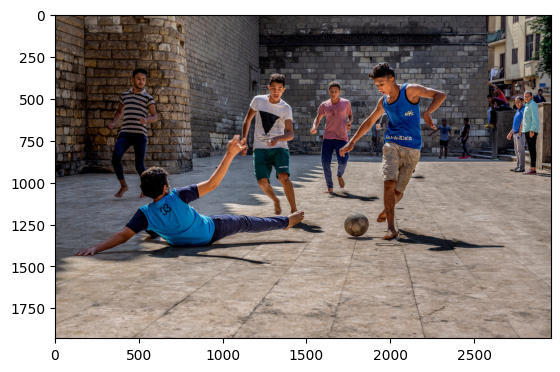

In [3]:
my_image = io.imread("./data/Boys_playing_street_football_in_Egypt.jpg")
print(my_image.shape)
plt.imshow(my_image)

## RGB And Grayscale image

- Grayscale Images
  - Single Color Channel
  - Pixel Value [0, 255]
---
- RGB Images
  - Three color channel
  - Each Pixel Value [0, 255]
  
---
- Binary Images
  - Single Color Channel
  - Pixel value either 0 or 1 [Black, White]


### RGB Pixel value

In [6]:
print(f"Shape of image is {my_image.shape}")
my_image[0, 0, :]

Shape of image is (1929, 2958, 3)


array([116, 103,  94], dtype=uint8)

### Gray Scale Value
- https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html

In [13]:
from skimage.color import rgb2gray

def to_gray_uint(image):
    return np.uint8(image * 255)

Shape of image is (1929, 2958)


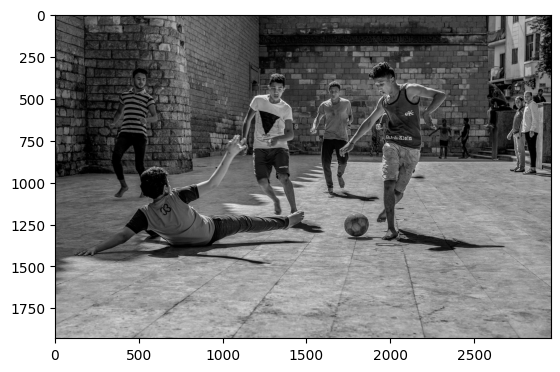

In [14]:
g_image = rgb2gray(my_image)
g_image = to_gray_uint(g_image)
print(f"Shape of image is {g_image.shape}")
plt.imshow(g_image, cmap='gray')

In [11]:
g_image[0, 0]

105

# Information in vision and complexity of vision problems

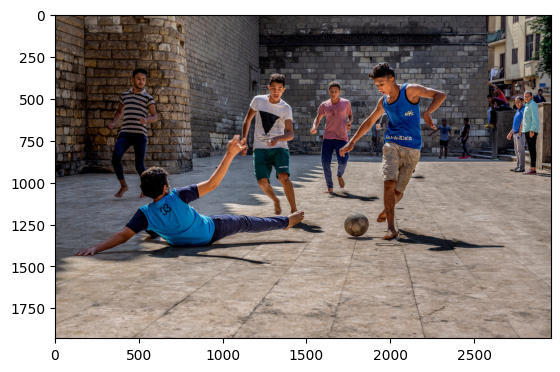

In [4]:
plt.imshow(my_image)

Information we can see in a fraction of seconds

- No of persons in the image
- Sport
- Weather
- Emotion of the persons
- And more..

Lets have a closer look at the digital equivalent of the image shown

In [16]:
my_image[200:210, 500:510, 0]

array([[113, 102,  85,  88,  91,  93,  91,  89,  87,  91],
       [111, 103,  84,  81,  85,  84,  78,  79,  83,  86],
       [113, 103,  82,  77,  89,  85,  75,  72,  75,  79],
       [113, 108,  96,  86,  89,  86,  72,  68,  73,  78],
       [110, 109, 102,  94,  95,  90,  75,  73,  77,  72],
       [101,  98,  96, 101, 102,  91,  81,  78,  75,  67],
       [ 75,  77,  82,  93,  96,  85,  82,  80,  76,  74],
       [ 57,  62,  69,  78,  81,  80,  80,  76,  79,  77],
       [ 41,  48,  57,  66,  77,  83,  81,  78,  80,  74],
       [ 34,  42,  46,  53,  68,  71,  77,  78,  77,  80]], dtype=uint8)

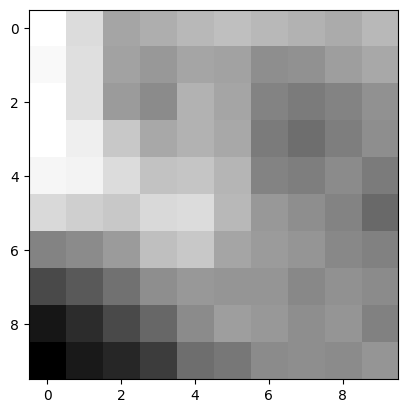

In [17]:
# plt.imshow(my_image[200:205, 500:505, :])
plt.imshow(my_image[200:210, 500:510, 0], cmap="gray")

**It is from these numbers that we seek to extract all the information**

---
---

# Q And A #1
---
---

In [38]:
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.filters import roberts, sobel, median, gaussian
from skimage.morphology import disk

# Image Filtering, Edge Detection And Thresholding
- https://www.cs.cornell.edu/courses/cs6670/2011sp/lectures/lec02_filter.pdf

## Image Filtering
- http://utsavdarlami.com.np/blogs/notes/2021-05-28--12-02-59z--image_convolution/
- https://vincmazet.github.io/bip/filtering/intro.html

Modify image pixels based on some function of a local neighbourhood of each pixel.

(522, 265)


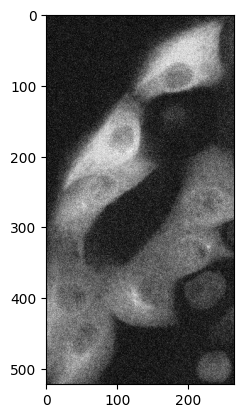

In [39]:
img = io.imread("./data/noisy_img.jpg")
img = rgb2gray(img_as_float(img))
print(img.shape)
plt.imshow(img, cmap="gray")

### Median Filter
- Replace each pixel with MEDIAN value of all pixels in neighbourhood
- Kernel (Window/Matrix)


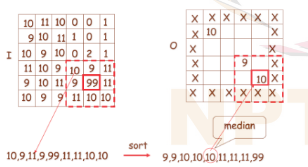

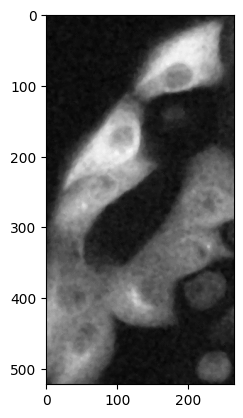

In [49]:
median_skimage = median(img, disk(3))
plt.imshow(median_skimage, cmap='gray')

In [47]:
# img_cv = cv2.imread("./data/noisy_img.jpg", 0) # 0 for grayscale
# median_cv = cv2.medianBlur(img_cv, 3)
# plt.imshow(median_cv, cmap='gray')

### Why filter a image
- To sharpen,
- smooth,
- intensify or
- enhance a image

### Gaussian Filter 

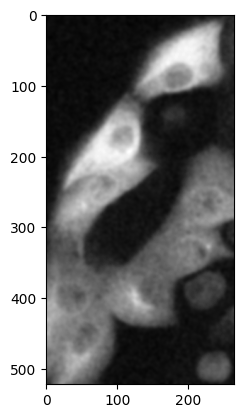

In [51]:
g_img2 = gaussian(img, sigma=2)
plt.imshow(g_img2, cmap='gray')

<!-- ![alt text](imgs/gaussian.png "Gaussian") -->

In [55]:
# g_img1 = cv2.GaussianBlur(img_cv, (3,3), 2, borderType=cv2.BORDER_CONSTANT)
# plt.imshow(g_img1, cmap='gray')

### Entropy Filter
- https://scikit-image.org/docs/stable/auto_examples/filters/plot_entropy.html

In [56]:
from skimage.filters.rank import entropy

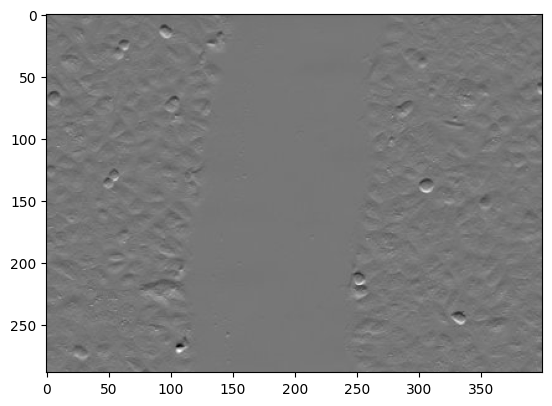

In [109]:
img = io.imread("./data/scratch.jpg") # wound microscopic image 
plt.imshow(img, cmap='gray')

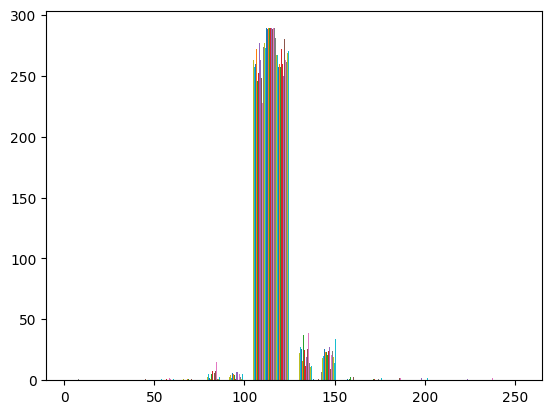

In [110]:
plt.hist(img)
plt.show()

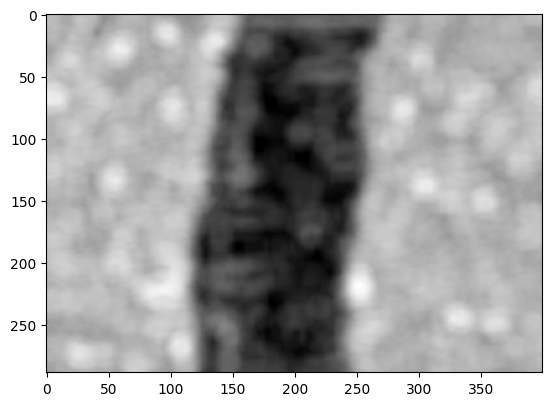

In [107]:
entr_img = entropy(img, disk(10))
plt.imshow(entr_img, cmap='gray')

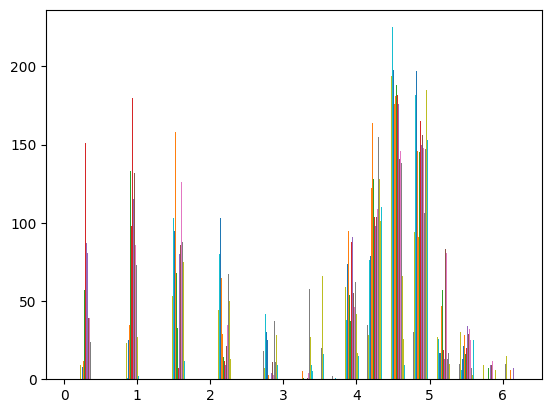

In [95]:
plt.hist(entr_img)
plt.show()

## Image Thresholding

- It is a way to create a binary image from a grayscale or full-color image. 
- This is typically done in order to separate "object" or foreground pixels from background pixels to aid in image processing.
- Image thresholding is a simple form of image segmentation. 

---
Ref
- https://muthu.co/otsus-method-for-image-thresholding-explained-and-implemented/ [Otsu’s method for image thresholding explained and implemented]

In [98]:
from skimage.filters import try_all_threshold, threshold_mean, threshold_otsu

### Mean Thresholding

In [101]:
thresh = threshold_mean(entr_img)
thresh, entr_img.mean()

(3.6088458311778924, 3.6088458311778924)

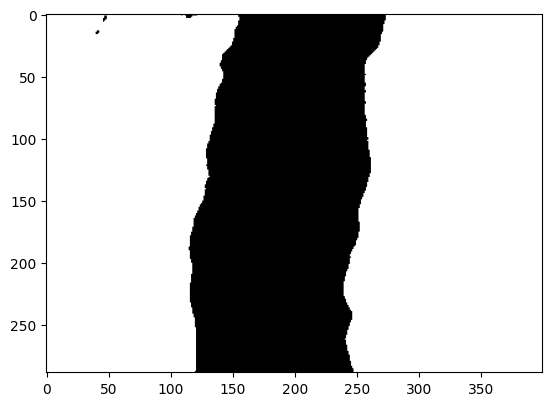

In [104]:
binary = entr_img > thresh
plt.imshow(binary, cmap='gray')

### Trying all 

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


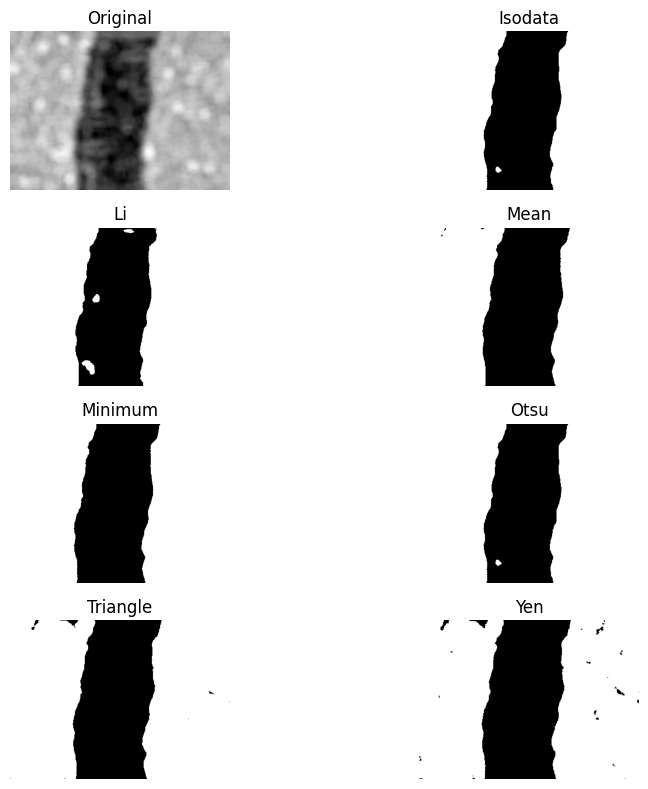

In [87]:
fig, ax = try_all_threshold(entr_img, figsize=(10, 8))

---
---

# Q And A #2
---
---

# Cell Scratch Analysis
- Lets do some analysis in the above image.
- i.e Find the percentage/area of wound

---
Thanks to 
- https://www.youtube.com/watch?v=jcUx-TQpcM8&list=PLZsOBAyNTZwbIjGnolFydAN33gyyGP7lT&index=23

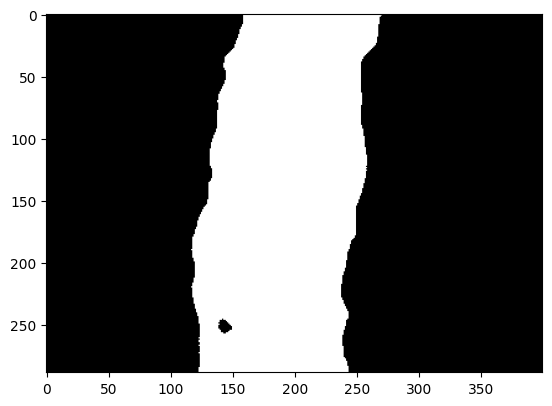

In [111]:
threshold_value = threshold_otsu(entr_img)
binary_img = entr_img <= threshold_value
plt.imshow(binary_img, cmap="gray")

## Pixel count

In [115]:
pixel_sum = [np.sum(binary_img == 0), np.sum(binary_img == 1)] # black, white
pixel_sum, sum(pixel_sum)

([81204, 34396], 115600)

In [117]:
print(binary_img.shape)
binary_img.shape[0] * binary_img.shape[1]

(289, 400)


115600

In [118]:
white_pixel_percent = np.sum(binary_img==1)/(np.sum(binary_img==1)+np.sum(binary_img==0))
round(white_pixel_percent*100, 2)

29.75

## Analysis on whole cell images

### function to calculate white pixel percentage given a image path

In [129]:
def calculate_white_pixel_percent(img_path):
    img = to_gray_uint(io.imread(img_path))
    entr_img = entropy(img, disk(10))
    threshold_value = threshold_otsu(entr_img)
    binary_img = entr_img <= threshold_value
    white_pixel_percent = np.sum(binary_img==1)/(np.sum(binary_img==1)+np.sum(binary_img==0))
    return round(white_pixel_percent*100, 2)

In [132]:
calculate_white_pixel_percent("./data/scratch.jpg")

29.75

### Do same for all the images 

In [124]:
folder_path = "./data/scratch_assay/*.jpg"
scratch_images = sorted(glob.glob(folder_path))
scratch_images, len(scratch_images)

(['./data/scratch_assay/Scratch0.jpg',
  './data/scratch_assay/Scratch1.jpg',
  './data/scratch_assay/Scratch2.jpg',
  './data/scratch_assay/Scratch3.jpg',
  './data/scratch_assay/Scratch4.jpg',
  './data/scratch_assay/Scratch5.jpg',
  './data/scratch_assay/Scratch6.jpg',
  './data/scratch_assay/Scratch7.jpg',
  './data/scratch_assay/Scratch8.jpg',
  './data/scratch_assay/Scratch9.jpg'],
 10)

In [133]:
time_list = []
area_list = []
for time, s_image in enumerate(scratch_images):
    area = calculate_white_pixel_percent(s_image)
    area_list.append(area)
    time_list.append(time)
area_list

[29.75, 24.69, 20.69, 17.93, 15.81, 13.63, 12.31, 10.95, 9.47, 7.66]

### Plotting the area wrt to time

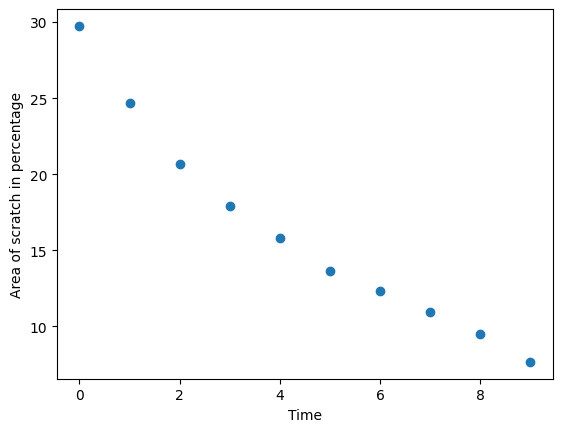

In [135]:
plt.scatter(time_list, area_list)
plt.xlabel("Time")
plt.ylabel("Area of scratch in percentage")
plt.show()

### Carrying out regression

In [136]:
from scipy.stats import linregress

In [137]:
linregress(time_list, area_list)

LinregressResult(slope=-2.2611515151515156, intercept=26.464181818181817, rvalue=-0.9720279253343863, pvalue=2.5895471348850457e-06, stderr=0.19316338117605045, intercept_stderr=1.0312102681218214)

In [140]:
# m, c, R, p, std_err = linregress(time_list, area_list)
# m

---
---

# Low and High Pass filters

## Low-Pass Filters

- Filters that allow low frequencies to pass through (block high frequencies).
- Example: Gaussian filter

## High-Pass Filters

- Filters that allow high frequencies to pass through (block low frequencies).
- Example: Edge filter

# Edge Detection
- http://utsavdarlami.com.np/blogs/notes/2021-05-31--03-54-38z--edge_filters/